In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [30]:
# Load the dataset
data_path = r"C:\Users\dell\Desktop\MyDocs\Docs\MK\traffic_accidents.csv" 
data = pd.read_csv(data_path)

In [31]:
# Step 1: Prepare the data
X = data.drop(columns=["accidents"])
y = data["accidents"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Step 3: Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
# Step 4: Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [36]:
# Step 5: Evaluate the model
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

In [37]:
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

In [38]:
# Print evaluation metrics
print("### Model Evaluation ###")
print(f"Training MAE: {mae_train:.2f}")
print(f"Training MAPE: {mape_train:.2%}")
print(f"Testing MAE: {mae_test:.2f}")
print(f"Testing MAPE: {mape_test:.2%}")

### Model Evaluation ###
Training MAE: 0.83
Training MAPE: 4.34%
Testing MAE: 0.81
Testing MAPE: 4.27%


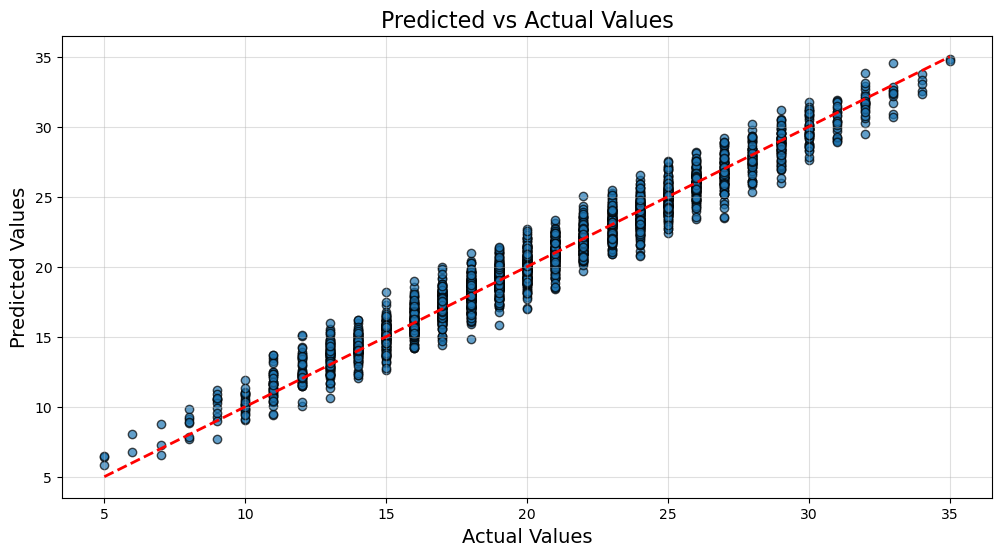

In [39]:
# Step 6: Visualize predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolor='black')
plt.title("Predicted vs Actual Values", fontsize=16)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.grid(alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", linewidth=2)
plt.show()